## Analisis Descriptivo de la Información

Con base en la base de datos que se decidio utilizar para dar el desarrollo a este proyecto proveniente de CEDE se procede a realizar un análisis descriptivo de la misma para detectar patrones en el comportamiento y realizar una "limpieza" de la información para evitar errores en las conclusiones de este proyecto.

In [2]:
## Carga de Librearias usadas en el análisis descriptivo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
## Se carga la data que se encuentra disponible en la carpeta del proyecto
df = pd.read_stata(r'docs\data\Homicidios_2003-Ag2017.dta')

In [5]:
## Se verifica su estructura
df.shape

(221538, 9)

In [7]:
## Se verifica como esta compuesta de forma general
df.head(5)

,Departamento,Municipio,coddepto,codmpio,fecha,genero,edad,grupo_edad,n_homicidios
0,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,27.0,ADULTOS,1.0
1,Antioquia,Medellín,5,5001.0,2003-01-01,FEMENINO,19.0,ADULTOS,1.0
2,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,18.0,ADULTOS,2.0
3,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,43.0,ADULTOS,1.0
4,Antioquia,Medellín,5,5001.0,2003-01-01,MASCULINO,28.0,ADULTOS,1.0


In [11]:
## Se revisan como se encuentran grabadas las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221538 entries, 0 to 221537
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Departamento  221538 non-null  object        
 1   Municipio     221538 non-null  object        
 2   coddepto      221538 non-null  int8          
 3   codmpio       221538 non-null  float64       
 4   fecha         221538 non-null  datetime64[ns]
 5   genero        221538 non-null  category      
 6   edad          219344 non-null  float64       
 7   grupo_edad    221538 non-null  category      
 8   n_homicidios  221538 non-null  float32       
dtypes: category(2), datetime64[ns](1), float32(1), float64(2), int8(1), object(2)
memory usage: 11.6+ MB


In [6]:
# Se verifica que la columna fecha este grabada como fecha en el df
df['fecha'] = pd.to_datetime(df['fecha'])

FileNotFoundError: [Errno 2] No such file or directory: '/docs/images/TotalHomTiem.png'

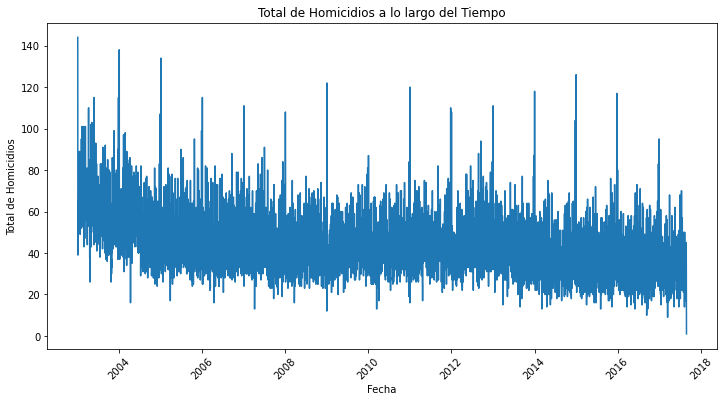

In [16]:
# Se agrupan el número de homicidios por fecha
homicidios_por_fecha = df.groupby('fecha')['n_homicidios'].sum().reset_index()

# Se gráfica
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='n_homicidios', data=homicidios_por_fecha)
plt.title('Total de Homicidios a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Homicidios')
plt.xticks(rotation=45)
plt.savefig('/docs/images/TotalHomTiem.png')
plt.show()

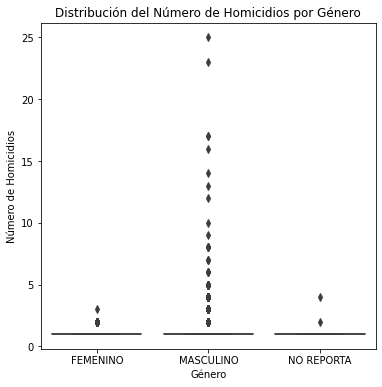

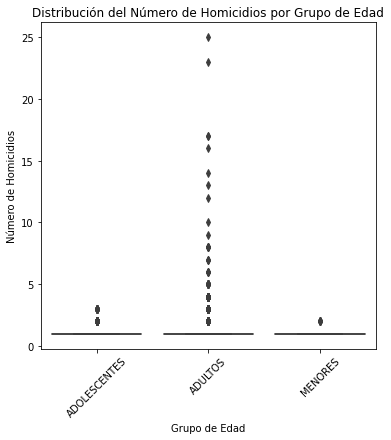

In [12]:

# Se genera un boxplot por genero y número de homicidios para determinar la relación entre ambas variables
plt.figure(figsize=(6, 6))
sns.boxplot(x='genero', y='n_homicidios', data=df)
plt.title('Distribución del Número de Homicidios por Género')
plt.xlabel('Género')
plt.ylabel('Número de Homicidios')
plt.show()

# Se genera un boxplot de grupo de edad por número de homicidios con el mismo objetivo de la gráfica anterior
plt.figure(figsize=(6, 6))
sns.boxplot(x='grupo_edad', y='n_homicidios', data=df)
plt.title('Distribución del Número de Homicidios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.show()

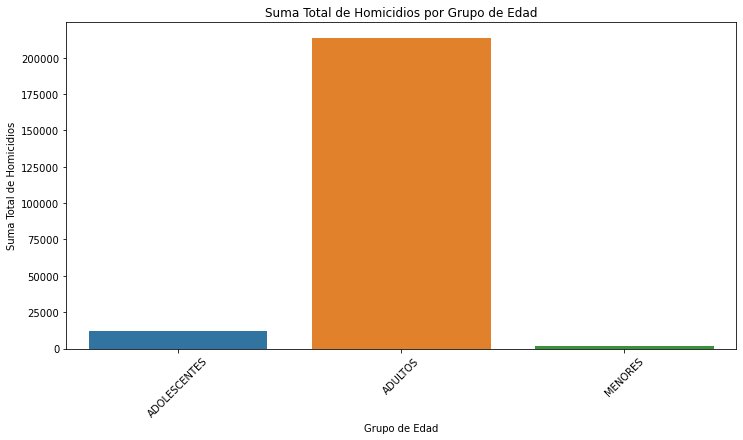

In [14]:
## Se verifica el número de homicidios por Grupo de Edad
# Crear un countplot para el número de homicidios por grupo de edad
plt.figure(figsize=(12, 6))
sns.barplot(x='grupo_edad', y='n_homicidios', data=df, estimator=sum)
plt.title('Suma Total de Homicidios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Suma Total de Homicidios')
plt.xticks(rotation=45)
plt.show()

In [7]:
df = df.drop(columns=["Extra", "Extra_1", "FECHA", "DELITO"])

In [8]:
df.rename(columns={'Fecha': 'FECHA', "Delito": "DELITO"}, inplace=True)

In [9]:
df['FECHA'] = pd.to_datetime(df['FECHA'])
# Mantener solo la parte de fecha (sin hora)
df['FECHA'] = df['FECHA'].dt.date

In [8]:
df.describe()

,coddepto,codmpio,edad,n_homicidios
count,221538.000000,221538.000000,219344.00000,221538.000000
mean,40.573378,40821.849430,32.23739,1.027232
std,29.050849,29066.391727,12.57412,0.208083
min,5.000000,5001.000000,0.00000,1.000000
25%,11.000000,11001.000000,23.00000,1.000000
50%,44.000000,44001.000000,30.00000,1.000000
75%,73.000000,73410.250000,39.00000,1.000000
max,99.000000,99773.000000,99.00000,25.000000


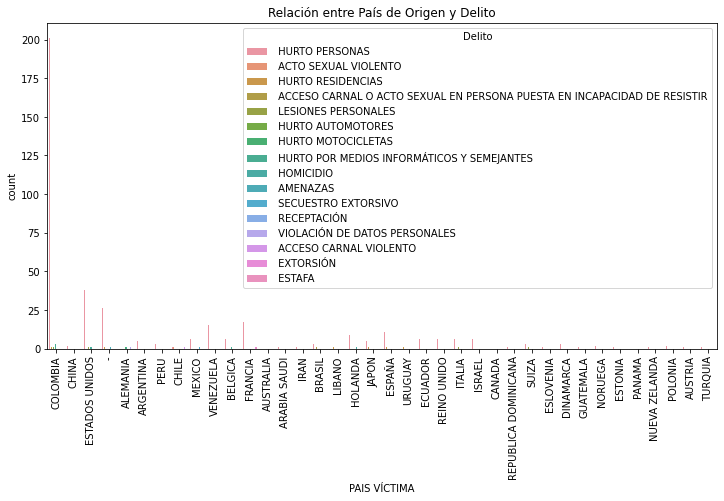

In [11]:
# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.countplot(x='PAIS VÍCTIMA', hue='DELITO', data=df)
plt.xticks(rotation=90)
plt.title('Relación entre País de Origen y Delito')
plt.legend(title='Delito', loc='upper right')
plt.show()

In [84]:
# Agrupar y contar los delitos por país
conteo_paises_delitos = df.groupby(['PAIS VÍCTIMA', 'DELITO']).size().reset_index(name='Conteo')

# Crear una gráfica interactiva de barras
fig = px.bar(conteo_paises_delitos, x='PAIS VÍCTIMA', y='Conteo', color='DELITO', title='Conteo de Delitos por País de Origen')

# Configurar el diseño de la gráfica
fig.update_layout(
    xaxis_title='País de Origen',
    yaxis_title='Conteo de Delitos',
    showlegend=True
)

# Mostrar la gráfica interactiva
fig.show()

In [35]:
# Crear una gráfica interactiva de barras con todos los países por defecto
fig = px.bar(conteo_paises_delitos, x='DELITO', y='Conteo', color='PAIS VÍCTIMA', title='Conteo de Delitos por País de Origen')

# Obtener la lista de países víctimas para el dropdown
paises_victimas = ['Todos los Países'] + list(conteo_paises_delitos['PAIS VÍCTIMA'].unique())

# Inicializar la aplicación de Dash
app = dash.Dash(__name__)

# Definir el diseño de la aplicación
app.layout = html.Div([
    html.H4('Conteo de Delitos por País de Origen'),
    dcc.Dropdown(
        id="dropdown",
        options=[{'label': pais, 'value': pais} for pais in paises_victimas],
        value='Todos los Países',
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])

# Definir el callback para actualizar la gráfica de barras
@app.callback(
    Output("graph", "figure"), 
    Input("dropdown", "value"))
def update_bar_chart(pais_seleccionado):
    if pais_seleccionado == 'Todos los Países':
        datos_filtrados = conteo_paises_delitos
    else:
        datos_filtrados = conteo_paises_delitos[conteo_paises_delitos['PAIS VÍCTIMA'] == pais_seleccionado]
    fig = px.bar(datos_filtrados, x="DELITO", y="Conteo", color="PAIS VÍCTIMA", title=f'Conteo de Delitos por País de Origen')
    fig.update_layout(
        xaxis_title='Delito',
        yaxis_title='Conteo de Delitos',
        showlegend=True,
        legend_title_text='País de Origen'
    )
    return fig

# Iniciar la aplicación
if __name__ == '__main__':
    app.run_server(debug=True)